# Housekeeping notes

- for this I'm just going to pull values from other notebooks

# Setup code

In [2]:
# Import Packages
import Pkg

Pkg.add("Plots")
Pkg.add("LsqFit")
Pkg.add("DelimitedFiles")
Pkg.add("PlotlyJS")  # optional if you later want interactive plots
Pkg.add("LaTeXStrings")

┌ Warning: could not download https://pkg.julialang.org/registries
│   exception = Downloads.RequestError("https://pkg.julialang.org/registries", 35, "The connection closed gracefully", Downloads.Response("https", "https://pkg.julialang.org/registries", 0, "", Pair{String, String}[]))
└ @ Pkg.Registry /Users/josie/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Registry/Registry.jl:77
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifes

Style for plots

In [3]:
using Plots,DelimitedFiles,LsqFit,LaTeXStrings

include("src/PhotoPeakFit.jl");

default(framestyle=:box,
        mc=:black,
        grid=false,
        guidefont=14,
        tickfont=12,
        lc=:navy,
        xlabel="Eᵧ (internal)",
        ylabel="counts")

May or may not need these, adding them for consistency

In [4]:
kliterature = [564.79,
               586.01,
               2013.45]

3-element Vector{Float64}:
  564.79
  586.01
 2013.45

Efficiency Calibrations
- may or may not need this either, inlcuding for consistency

In [5]:
# Fit function is of the form 50^(p[1]+p[2]*log10(e)+p[3]*log10(e)^2)
io = open("calibrations/Eu152-efficiency-cal.csv", "r")
clover_eff_params = readdlm(io, ',', Float64, '\n', comments=true, comment_char='#')
close(io)

c0_eff_fit, c1_eff_fit, c2_eff_fit = clover_eff_params[1,:],clover_eff_params[2,:],clover_eff_params[3,:]

c0_eff_params,c1_eff_params,c2_eff_params = [c0_eff_fit[1],c0_eff_fit[3],c0_eff_fit[5]],
                                            [c1_eff_fit[1],c1_eff_fit[3],c1_eff_fit[5]],
                                            [c2_eff_fit[1],c2_eff_fit[3],c2_eff_fit[5]]

c0_σeff,c1_σeff,c2_σeff = [c0_eff_fit[2],c0_eff_fit[4],c0_eff_fit[6]], 
                          [c1_eff_fit[2],c1_eff_fit[4],c1_eff_fit[6]],
                          [c2_eff_fit[2],c2_eff_fit[4],c2_eff_fit[6]]

([0.04994475356378319, 0.03881764706440051, 0.0074349631904078745], [0.059208192080767955, 0.0466367978146129, 0.009090355673327628], [0.048188710602606065, 0.03712260347339793, 0.007054630479249403])

# Values from previous books

## K47_T1_001

In [6]:
N_0_plus = [551112.459447147, 3.2015988389246287e6, 1.415436367300364e6]
N_0_σplus = [5093.306800184273, 29643.71840995894, 13254.733084601521]

N_180_plus = [76156.0625946827, 435329.2792522732, 203994.8023015002]
N_180_σplus = [1370.7139462257294, 7199.422159068407, 2232.2697899070095]

3-element Vector{Float64}:
 1370.7139462257294
 7199.422159068407
 2232.2697899070095

## K47_T1_002

In [7]:
N_0_minus = [1.7292393731881208e6, 9.88212108370103e6, 4.398562361741757e6]
N_0_σminus = [16050.629959403417, 93756.90047874278, 39184.186824577744]

N_180_minus = [236566.33601433228, 1.3565204672148577e6, 634836.849390847]
N_180_σminus = [3961.9639426417566, 21960.829776956114, 6969.598277971881]

3-element Vector{Float64}:
  3961.9639426417566
 21960.829776956114
  6969.598277971881

# IS733 analysis report

In [13]:
R_fun(A, B, C, D) = (A .* D) ./ (B .* C)


err(A, B, C, D, σA, σB, σC, σD) = ((((σA) .^2) .* ((D ./ (B .* C)) .^ 2)) .+ (((σB) .^ 2) .* (((-A .* D) ./ ((B .^ 2) .* C)) .^ 2)) .+ (((σC) .^2) .* (((-A .* D) ./ (B .* (C .^ 2))) .^2)) .+ (((σD) .^ 2) .* ((A ./ (B .* C)) .^ 2))) .^ (0.5)

R = R_fun(N_0_plus, N_180_plus, N_0_minus, N_180_minus)
println(R)

error_r = err(N_0_plus, N_180_plus, N_0_minus, N_180_minus, N_0_σplus, N_180_σplus, N_0_σminus, N_180_σminus)
println(error_r)


[0.9899963090942512, 1.0095439160443338, 1.0014346681068445]
[0.027578271772194997, 0.02692533110808561, 0.02021125625605141]


In [16]:
AP = (((R) .^ (0.5)) .- 1) ./ (((R) .^ (0.5)) .+ 1)

err_AP(V, σV) = σV ./ ((V .^ 0.5) .* (((V .^ 0.5) .+ 1) .^ 2))

error_AP = err_AP(R, error_r)

println(AP)
println(error_AP)

[-0.0025135107187665086, 0.0023746606845474237, 0.0003584099731058751]
[0.006964192009256621, 0.006667659238957062, 0.005045574689851701]


## Plots

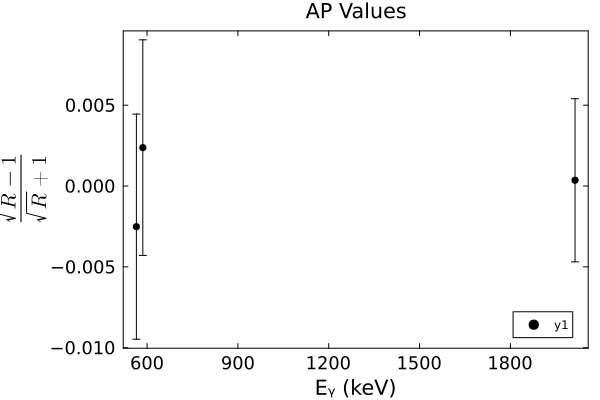

In [ ]:
using Plots

# your plot command
p = scatter(kliterature, AP, yerr=error_AP,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{\sqrt{R} - 1}{\sqrt{R} + 1}",
    title = "AP Values"
)

# optional horizontal line
# hline!(p, [0])

In [24]:
# Saving plot to directory
savefig(p, "ap_plot.pdf")

"/Users/josie/Desktop/Research/Madurga/VITO-ENiGMA/ap_plot.pdf"